### Installing the Necessary Packages

In [3]:
import torch
import cv2
import os, sys

### Removing Duplicate Images from the Folder

In [4]:
sys.path.append(os.path.abspath('../scripts'))

In [5]:
import remove_duplicate_images as rem_dup

In [6]:
image_folder = '../photos'


In [7]:
rem_dup.remove_duplicate_images_by_size(image_folder)

Removed duplicate: @CheMed123_20.jpg
Removed duplicate: @CheMed123_25.jpg
Removed duplicate: @CheMed123_9.jpg
Removed duplicate: @lobelia4cosmetics_10040.jpg
Removed duplicate: @lobelia4cosmetics_10070.jpg
Removed duplicate: @lobelia4cosmetics_10071.jpg
Removed duplicate: @lobelia4cosmetics_10073.jpg
Removed duplicate: @lobelia4cosmetics_10074.jpg
Removed duplicate: @lobelia4cosmetics_10075.jpg
Removed duplicate: @lobelia4cosmetics_10079.jpg
Removed duplicate: @lobelia4cosmetics_10080.jpg
Removed duplicate: @lobelia4cosmetics_10081.jpg
Removed duplicate: @lobelia4cosmetics_10082.jpg
Removed duplicate: @lobelia4cosmetics_10095.jpg
Removed duplicate: @lobelia4cosmetics_10096.jpg
Removed duplicate: @lobelia4cosmetics_10097.jpg
Removed duplicate: @lobelia4cosmetics_10098.jpg
Removed duplicate: @lobelia4cosmetics_10109.jpg
Removed duplicate: @lobelia4cosmetics_10111.jpg
Removed duplicate: @lobelia4cosmetics_10114.jpg
Removed duplicate: @lobelia4cosmetics_10115.jpg
Removed duplicate: @lobeli

### Detecting Objects from the Images using Yolo

In [24]:

# Load pre-trained YOLOv5 model (use 'yolov5s', 'yolov5m', 'yolov5l', or 'yolov5x')
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Directory to save detection results (all images will be saved here)
save_dir = 'detection_results/'

# Create the directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Loop through the images in the folder and run object detection
for img_name in os.listdir(image_folder):
    img_path = os.path.join(image_folder, img_name)

    # Read the image using OpenCV
    img = cv2.imread(img_path)

    # Run object detection
    results = model(img)

    # Extract the results (bounding boxes, labels, etc.) and render them on the image
    results_img = results.render()[0]  # Renders the detected objects on the original image

    # Save the rendered image directly to the detection_results directory
    output_img_path = os.path.join(save_dir, img_name)
    cv2.imwrite(output_img_path, results_img)

print(f"All images have been processed and saved in {save_dir}.")



Using cache found in C:\Users\Blen/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-10-15 Python-3.11.5 torch-2.4.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
C:\Users\Blen/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Blen/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Blen/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Blen/.cache\torch\hub\ultralytics_yolov5_master

All images have been processed and saved in detection_results/.


### Saving Additional Detected Information to a CSV File

In [26]:

import pandas as pd

# Directory to save detection information
info_dir = 'detection_results_info/'

# Create the directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Initialize an empty DataFrame to store all detections
all_detections = pd.DataFrame()

# Loop through the images in the folder and run object detection
for img_name in os.listdir(image_folder):
    img_path = os.path.join(image_folder, img_name)

    # Run object detection
    results = model(img_path)  # Using the image path directly, no need to reload the image

    # Extract data from results
    detections = results.pandas().xyxy[0]  # Pandas dataframe of detection results

    # Add a column for the image name to keep track of which image each detection belongs to
    detections['image'] = img_name

    # Select only the required columns and append to the all_detections DataFrame
    all_detections = pd.concat([all_detections, detections[['image', 'name', 'confidence', 'xmin', 'ymin', 'xmax', 'ymax']]])

# Save the consolidated detections to a single CSV file
output_csv_path = os.path.join(info_dir, 'all_detections.csv')
all_detections.to_csv(output_csv_path, index=False)

print(f"All detection information saved in {output_csv_path}.")


C:\Users\Blen/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Blen/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Blen/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Blen\AppData\Local\Temp\ipykernel_19984\2087633808.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior

All detection information saved in detection_results_info/all_detections.csv.


C:\Users\Blen\AppData\Local\Temp\ipykernel_19984\2087633808.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_detections = pd.concat([all_detections, detections[['image', 'name', 'confidence', 'xmin', 'ymin', 'xmax', 'ymax']]])


### Taking a Look at Some of the Detected Images

In [33]:
import os
from PIL import Image
from IPython.display import display

def display_5_images(folder_path):
  """Displays the first 5 images in a given folder within a Jupyter Notebook.

  Args:
    folder_path (str): The path to the folder containing the images.
  """

  image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.gif'))]

  if len(image_files) < 5:
    print("There are less than 5 images in the folder.")
    return

  for i in range(5):
    image_path = os.path.join(folder_path, image_files[i])
    image = Image.open(image_path)
    display(image)



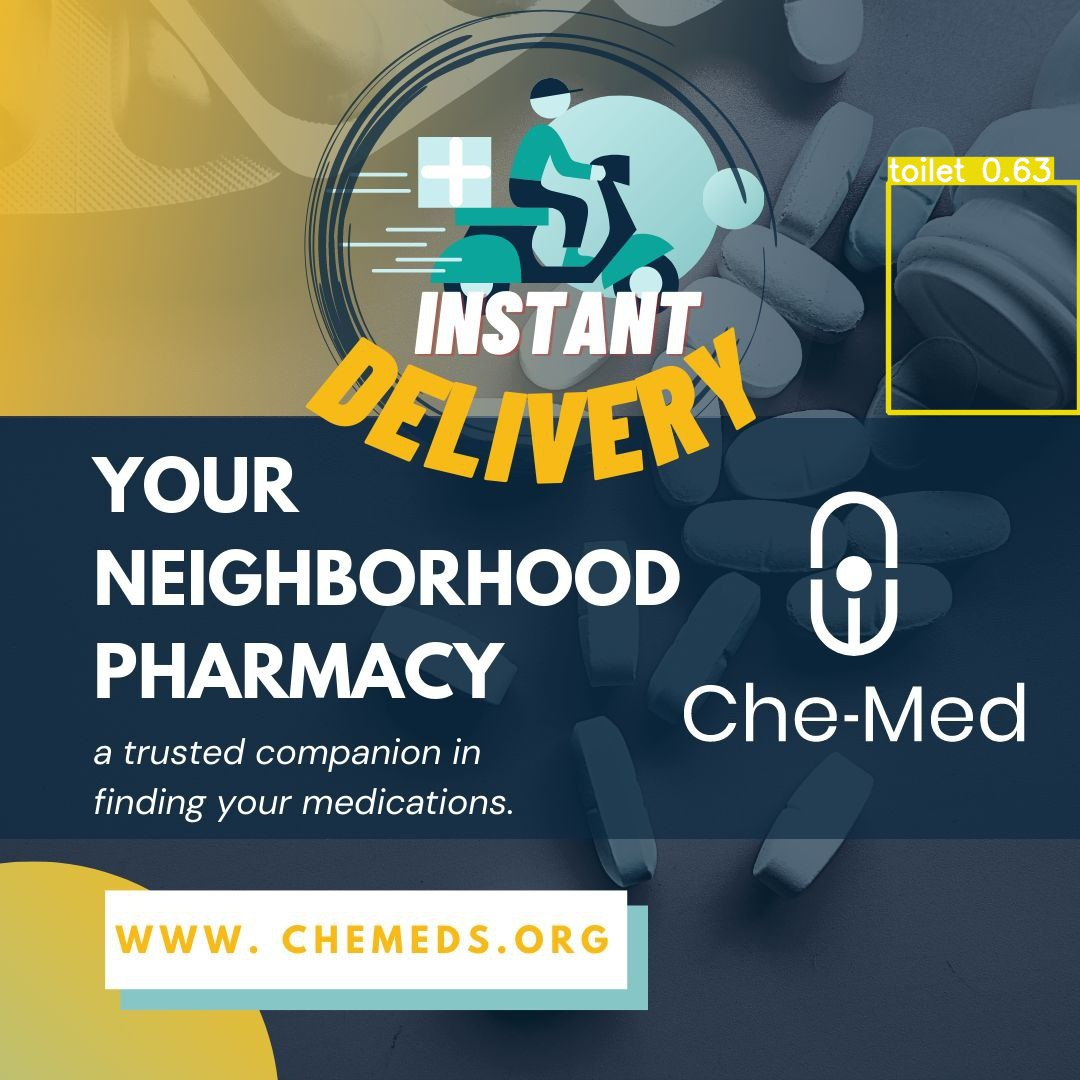

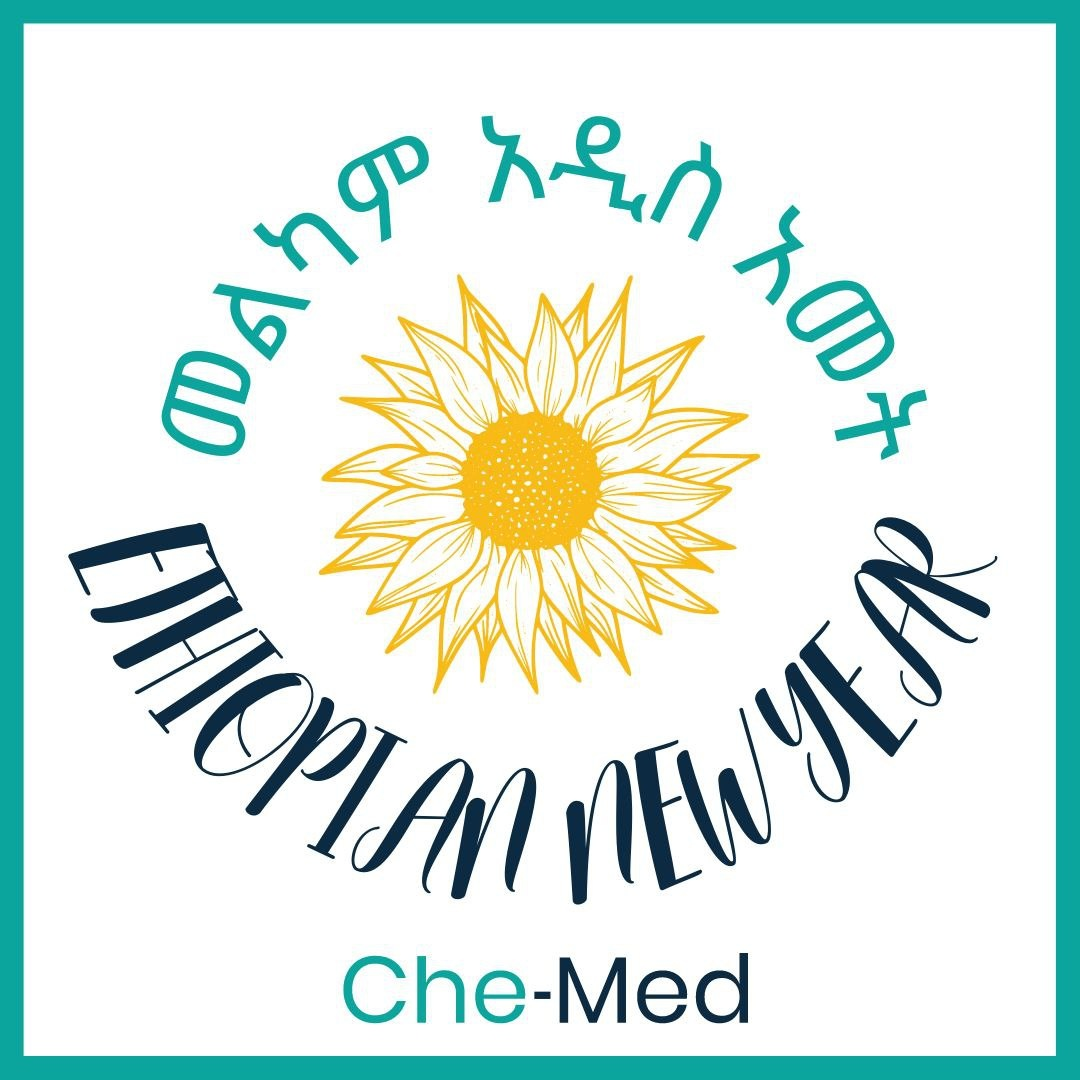

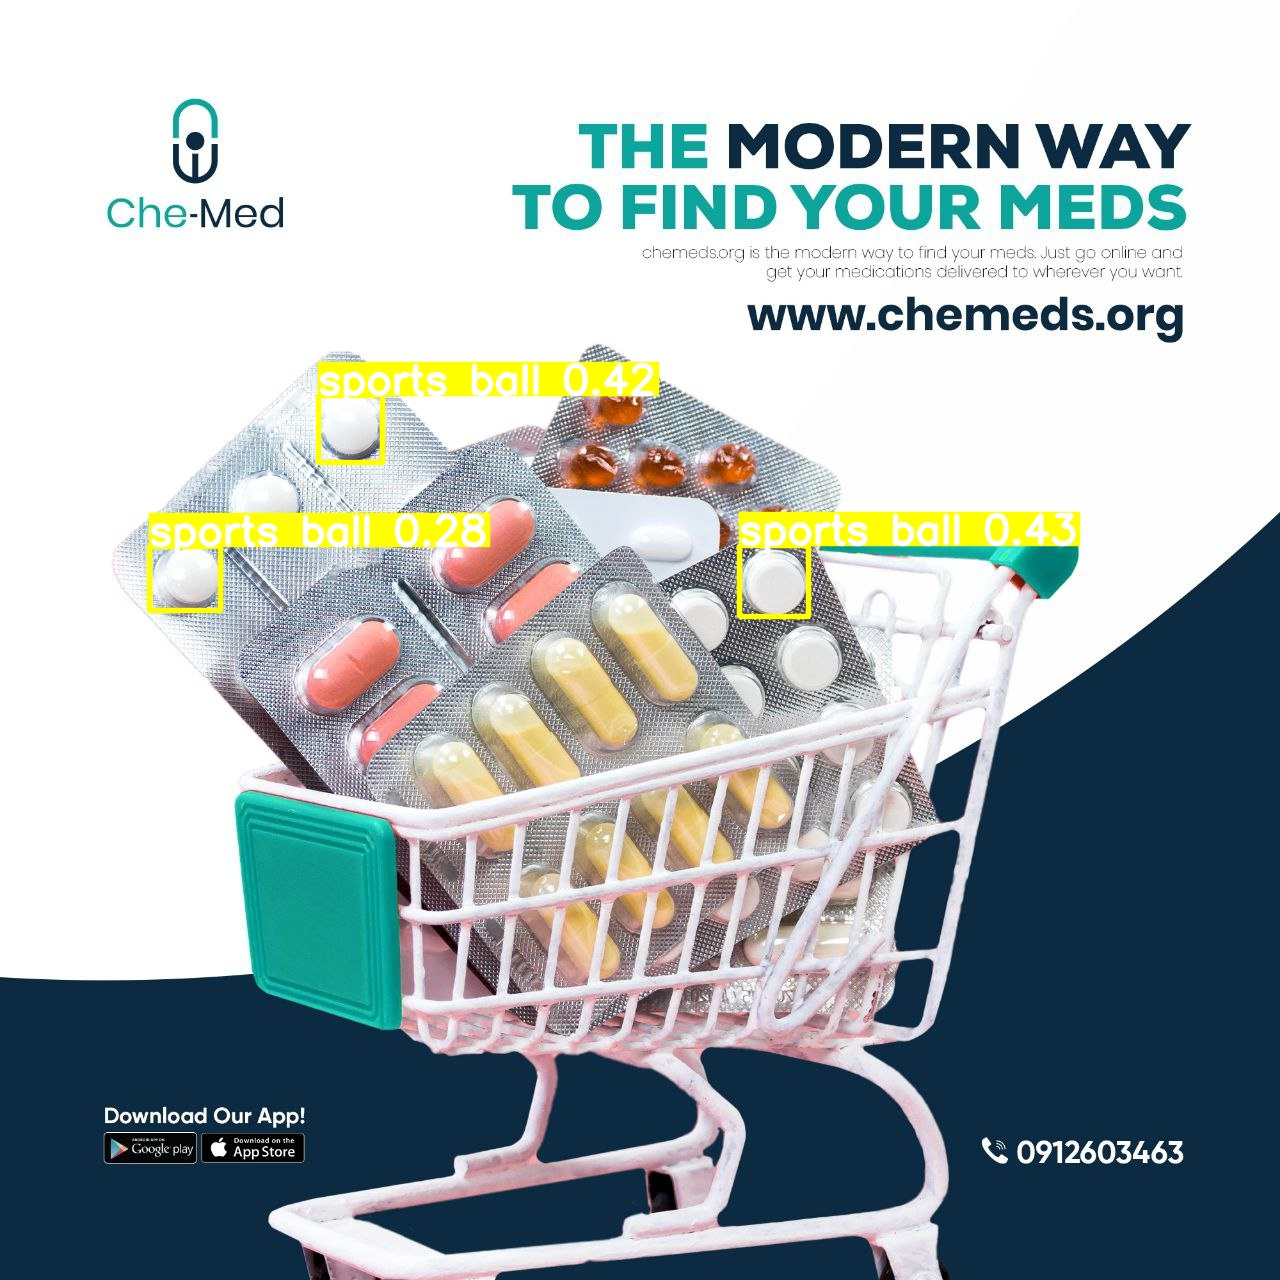

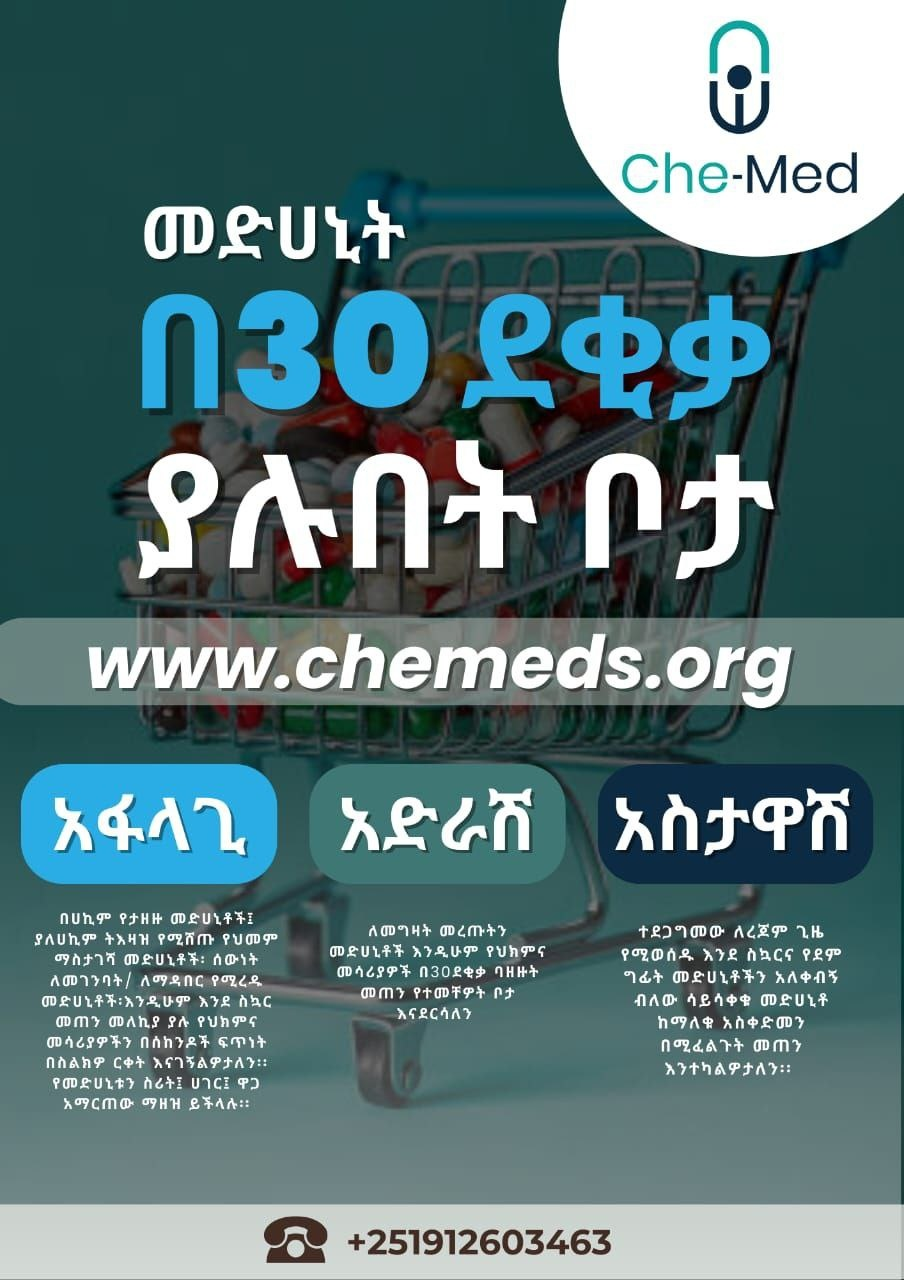

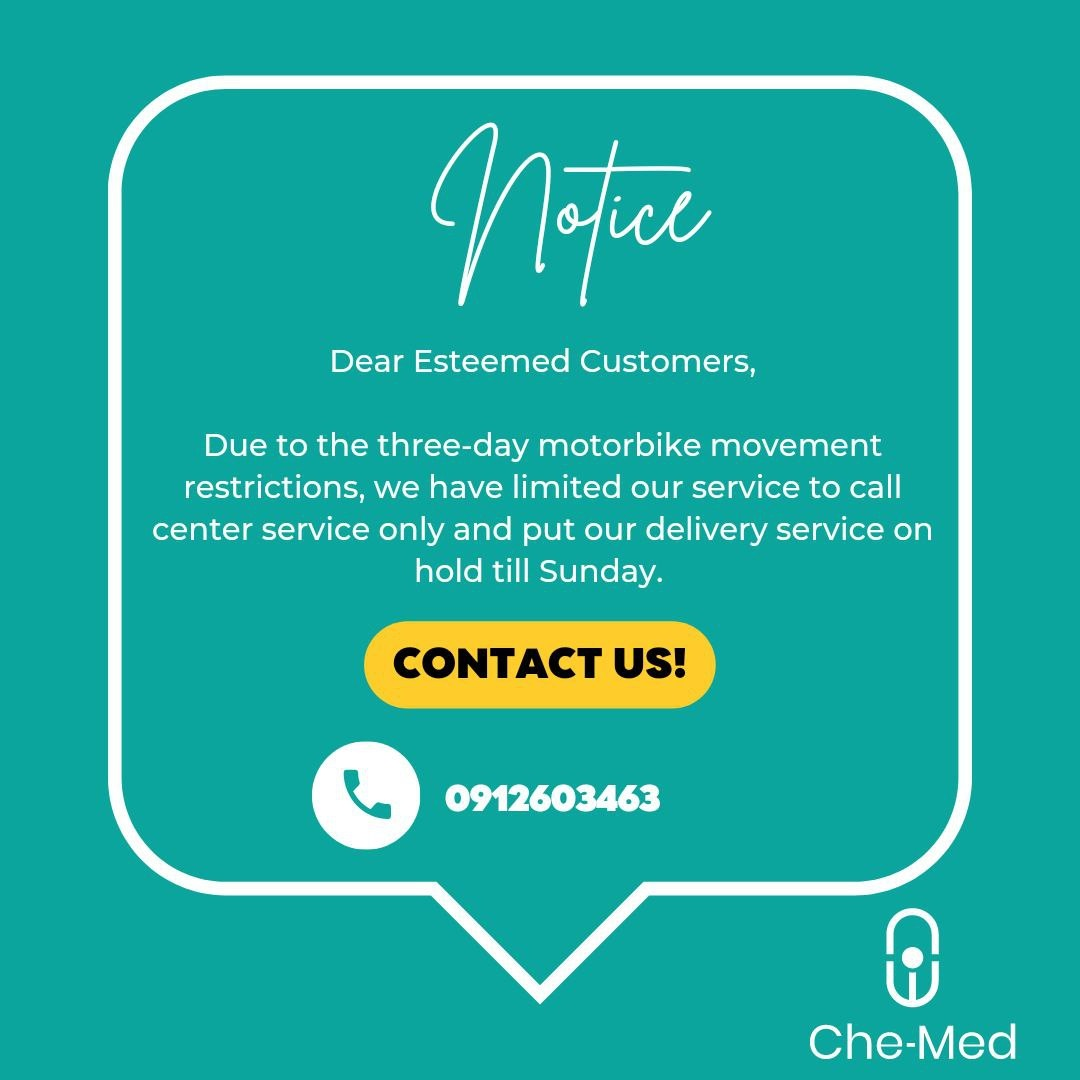

In [34]:
folder_path = 'detection_results/'
display_5_images(folder_path)